1. 데이터 수집
2. class Dataset 에서 데이터 불러오기, 데이터 길이, map-style(하나의 데이터를 불러올 때 어떻게 반환할지) 정의
3. class transform 에서 tensor로 변환, 전처리, 데이터 증강 등 
4. DataLoader에서 데이터를 묶어 batch를 만들고, 섞어줌
5. 모델로 학습

## class Dataset
- 데이터 입력 형태를 정의하는 클래스
- 데이터 입력방식의 표준화

In [1]:
import torch
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, text, labels):
    # 초기 데이터 생성 방법을 지정(폴더 정의 등)
        self.labels = labels
        self.data = text
        
    def __len__(self):
    # 데이터의 전체 길이 return
        return len(self.labels)
    
    def __getitem__(self, idx):
    # index 값을 주었을 때 반환되는 데이터의 형태 (X, y)
        label = self.labels[idx]
        text = self.data[idx]
        
        # 꼭 dic로 반환할 필요는 없음
        sample = {"Text": text, "Class": label}
        return sample

### dataset 클래스 생성시 유의점
- 데이터 형태에 따라 각 함수를 다르게 정의
- 모든것을 데이터 생성 시점에 처리할 필요는 없음
    - image의 tensor변화는 학습에 필요한 시점에 변환
- 데이터 셋에 대한 표준화된 처리방법 제공 필요

## DataLoader
- data의 batch를 생성
- 학습직접(GPU feed전) 데이터의 변환을 책임
- Tensor로 변환 + Batch처리가 메인업무
- 병렬적인 데이터 전처리 코드의 고민 필요

In [3]:
from torch.utils.data import DataLoader

text = ['Happy', 'Amazing', 'Sad', 'Unhapy', 'Glum']
labels = ['Positive', 'Positive', 'Negative', 'Negative', 'Negative']
# Dataset 생성
MyDataset = CustomDataset(text, labels)

# DataLoader 생성(Batch의 크기 2, 매 epoch마다 데이터셋 shuffle)
MyDataLoader = DataLoader(MyDataset, batch_size=2, shuffle=True)

for dataset in MyDataLoader:
    print(dataset)

{'Text': ['Amazing', 'Glum'], 'Class': ['Positive', 'Negative']}
{'Text': ['Unhapy', 'Happy'], 'Class': ['Negative', 'Positive']}
{'Text': ['Sad'], 'Class': ['Negative']}


### DataLoader 파라미터
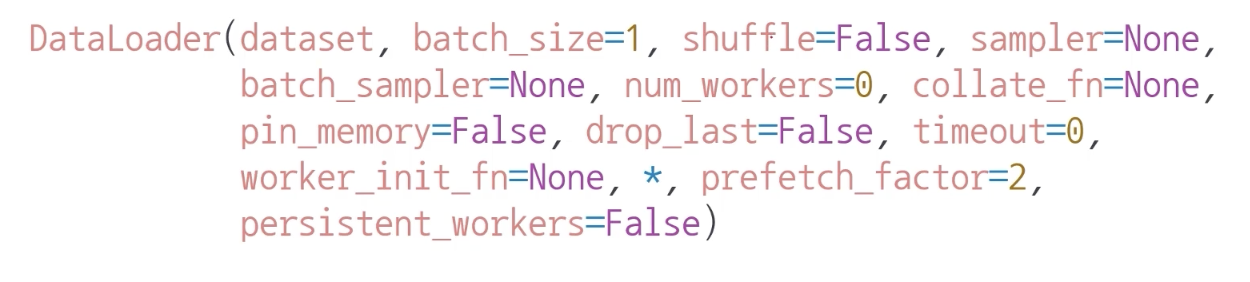

#### collate_fn 
- 같은 batch안에 input의 길이가 다르면 오류가 발생
- 오류를 해결하기 위해선 input의 길이를 동일하게 맞춰야함
- 같은 batch안에 길이가 가장 긴 input에 맞춰서 다른 값에 임의의 0을 넣어주는 역할

- pytorch Dataset, Dataloader 튜토리얼
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html